In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv("datasets/notes.csv")

In [4]:
ds.describe()

,variance,skewness,curtosis,entrophy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
ds.shape

(1372, 5)

In [6]:
print(ds["class"].value_counts())
ds.head()


0    762
1    610
Name: class, dtype: int64


,variance,skewness,curtosis,entrophy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
ds_real = ds[ds["class"] == 0]
ds_fake = ds[ds["class"] == 1]

## Univariate Analysis

TypeError: boxplot() got an unexpected keyword argument 'label'

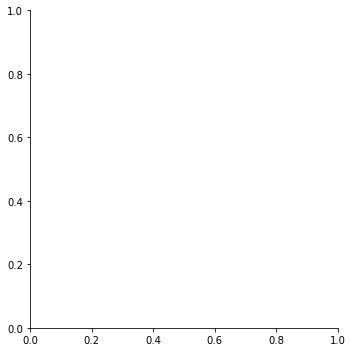

In [10]:
# sns.FacetGrid(ds,hue="class",height = 4).map(sns.distplot,"variance").add_legend()
sns.FacetGrid(ds,hue="class",height=5).map(sns.boxplot,"variance").add_legend()

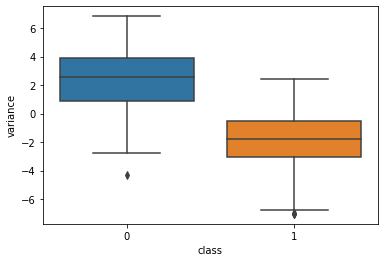

In [12]:
sns.boxplot(x="class",y="variance",data=ds)

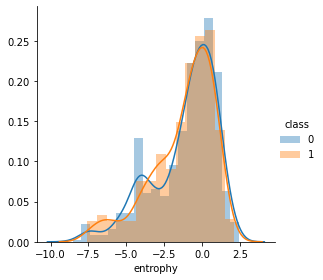

In [38]:
sns.FacetGrid(ds,hue="class",height = 4).map(sns.distplot,"entrophy").add_legend()

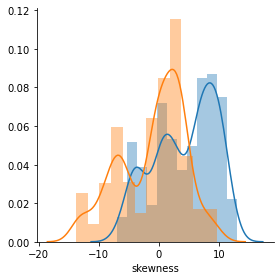

In [17]:
sns.FacetGrid(ds,hue="class",height = 4).map(sns.distplot,"skewness")

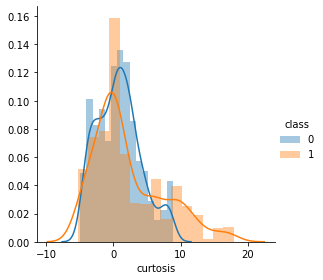

In [39]:
sns.FacetGrid(ds,hue="class",height = 4).map(sns.distplot,"curtosis").add_legend()

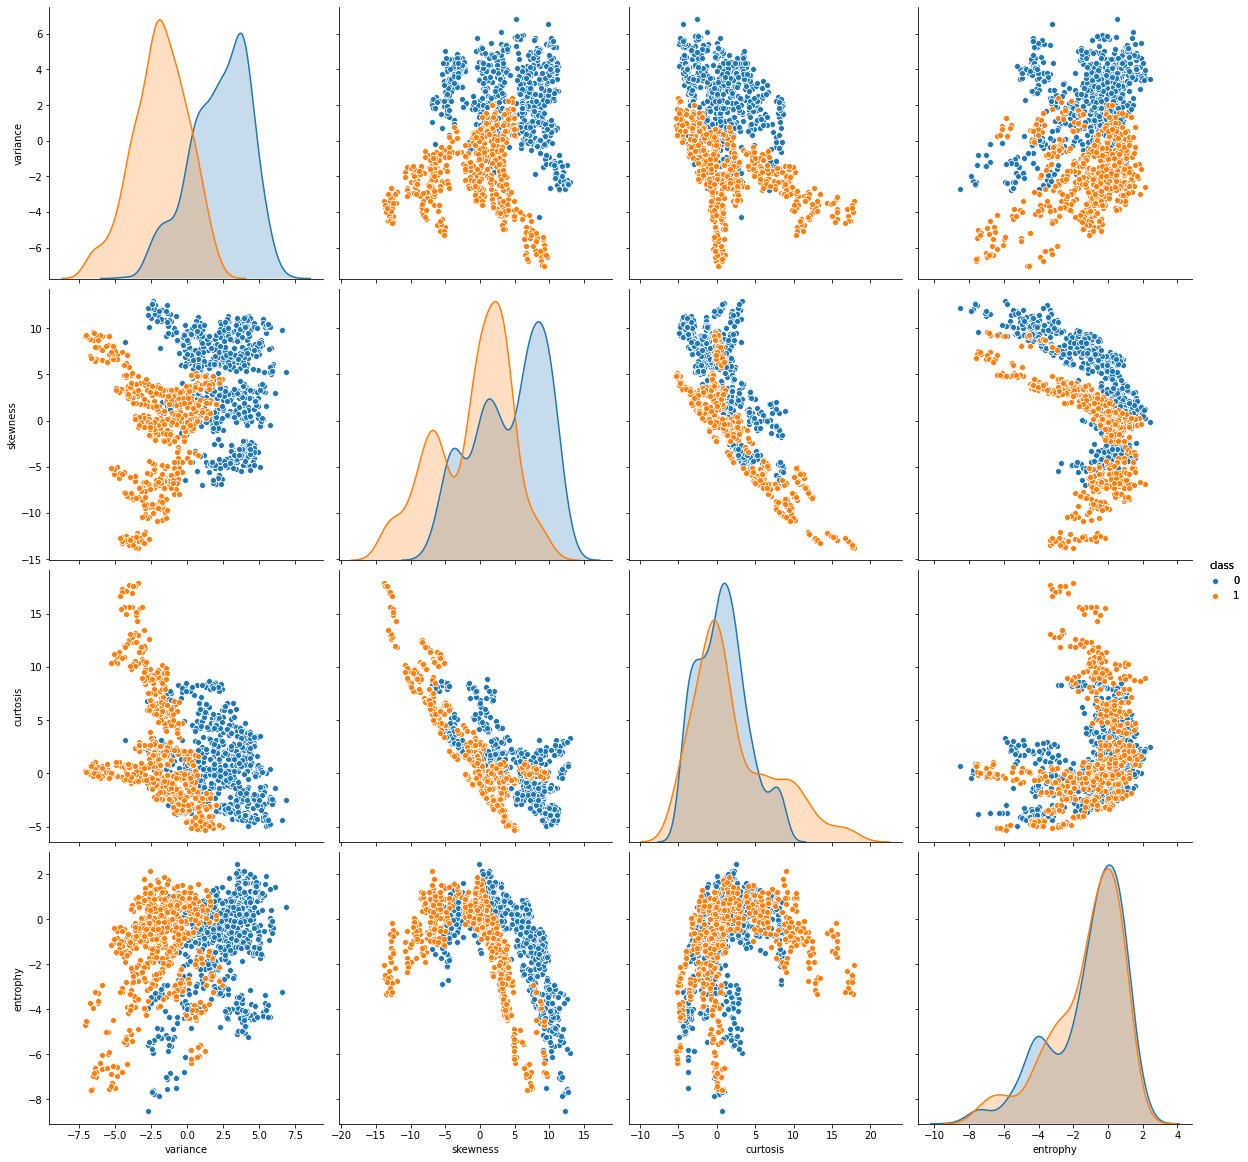

In [40]:
sns.pairplot(ds,hue="class",height=4)

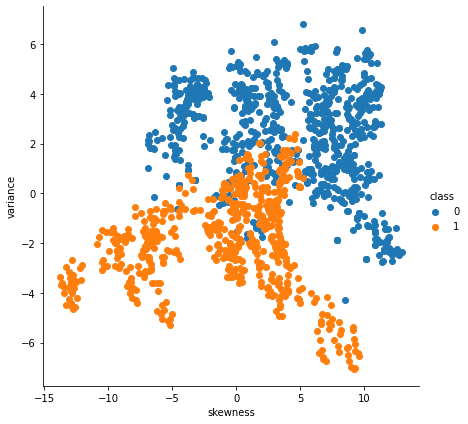

In [53]:
sns.FacetGrid(ds,hue="class",height=6) \
    .map(plt.scatter,"skewness","variance") \
    .add_legend()

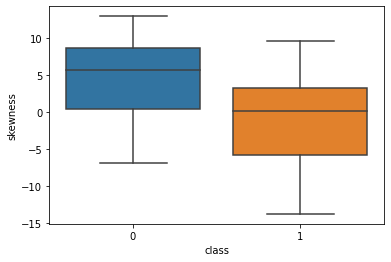

In [42]:
sns.boxplot(x="class",y="skewness",data=ds)

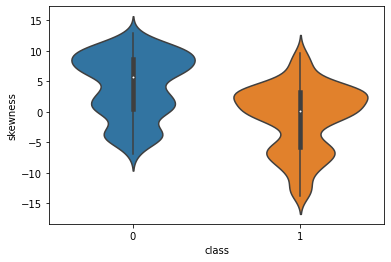

In [46]:
sns.violinplot(x="class",y="skewness",data = ds)

In [33]:
def draw_cdf(dataset,field):
    counts,bin_edges = np.histogram(dataset[field],bins=10,density=True)
    pdf = counts / (sum(counts))
    cdf = np.cumsum(pdf)
    
    #plot pdf
    plt.plot(bin_edges[1:],pdf)
    #plot cdf
    plt.plot(bin_edges[1:],cdf)
    plt.show()
    

## PDF & CDF

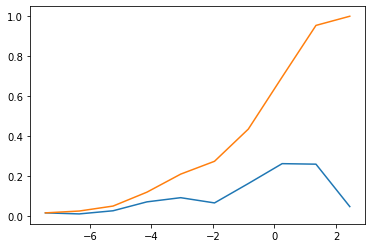

In [35]:
draw_cdf(ds_real,"entrophy")
# draw_cdf(ds_real,"")

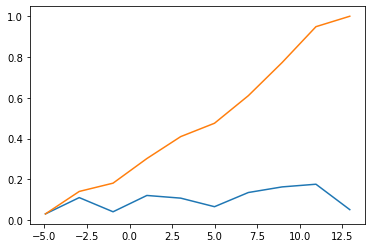

In [36]:
draw_cdf(ds_real,"skewness")

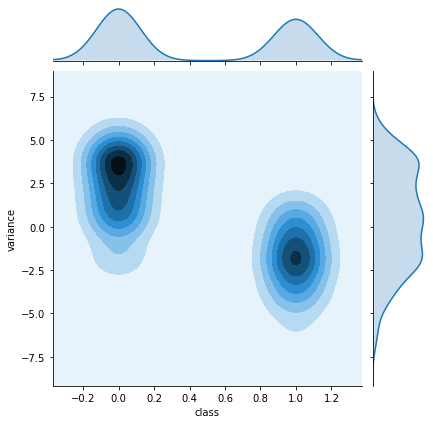

In [56]:
sns.jointplot(x = 'class', y = 'variance', data = ds, kind = 'kde')
plt.show()